# Outliers

In [30]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import numpy as np

Al guardar el dataset en la sección anterior, pandas agrega una columna `Unnamed: 0` con los indices de las filas, esta columna no nos es util por lo cual la eliminamos al cargar el dataset

In [149]:
stage_1_data = pd.read_csv('../data/bus_data_stage_1.csv')
stage_1_data = stage_1_data.drop(['Unnamed: 0'], axis=1)
stage_1_data.head()

id  line  longitude   latitude            timestamp
0    76   217 -56.222400 -34.855885  2018-10-02 14:38:53
1   984   540 -56.201860 -34.909360  2018-10-02 14:39:08
2   288  7898 -56.175415 -34.901110  2018-10-02 14:39:08
3  1111   254 -56.136640 -34.872833  2018-10-02 14:39:08
4    22   540 -56.135277 -34.845554  2018-10-02 14:39:08

Vemos los diferentes tipos de datos con los que estamos trabajando

In [150]:
stage_1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96496 entries, 0 to 96495
Data columns (total 5 columns):
id           96496 non-null int64
line         96496 non-null int64
longitude    96496 non-null float64
latitude     96496 non-null float64
timestamp    96496 non-null object
dtypes: float64(2), int64(2), object(1)
memory usage: 3.7+ MB


Reordenamos el dataset y vemos algunas medidas estadisticas de los datos

In [151]:
_ = pd.DataFrame(columns=['id', 'line', 'longitude', 'latitude', 'timestamp'])
_.id   = stage_1_data.id
_.line = stage_1_data.line
_.longitude  = stage_1_data.longitude
_.latitude   = stage_1_data.latitude
_.timestamp  = stage_1_data.timestamp
stage_1_data = pd.DataFrame(_)
del _

In [152]:
stage_1_data.describe()

id          line     longitude      latitude
count  96496.000000  96496.000000  96496.000000  96496.000000
mean     348.944153   2671.002933    -56.147596    -34.875496
std      368.219358   3113.855989      0.038840      0.029654
min        2.000000    217.000000    -56.256016    -34.928585
25%       53.000000    266.000000    -56.174942    -34.900887
50%      110.000000    565.000000    -56.148083    -34.881416
75%      709.000000   7516.000000    -56.128693    -34.863860
max     1111.000000   7929.000000    -55.995388    -34.715830

![Montevideo](images/montevideo.png)

Sabemos que montevideo esta contenido en una _Bounding Box_ con las siguientes coordenadas:

Izquierda: **-56.434944**

Derecha  : **-56.015140**

Arriba   : **-34.696519**

Abajo    : **-34.938120**

In [153]:
UPPER_BOUND, LOWER_BOUND, RIGHT_BOUND, LEFT_BOUND = [-34.696519, -34.938120, -56.015140,  -56.434944]
UPPER_LAT = stage_1_data.latitude.max()
LOWER_LAT = stage_1_data.latitude.min()
RIGHT_LON = stage_1_data.longitude.max()
LEFT_LON  = stage_1_data.longitude.min()
print('Max Latitude: {0}\nMin Latitude: {1}\nMax Longitude: {2}\nMin Longitude: {3}\n'
      .format(UPPER_LAT, LOWER_LAT, RIGHT_LON, LEFT_LON))
print('Upper boundin is OK') if UPPER_LAT <= UPPER_BOUND else print('Upper boundin is WRONG with difference: {0}'
                                                                         .format(abs(UPPER_BOUND-UPPER_LAT)))
print('Lower boundin is OK') if LOWER_LAT >= LOWER_BOUND else print('Lower boundin is WRONG with difference: {0}'
                                                                         .format(abs(LOWER_BOUND-LOWER_LAT)))
print('Right boundin is OK') if RIGHT_LON <= RIGHT_BOUND else print('Right boundin is WRONG with difference: {0}'
                                                                         .format(abs(RIGHT_BOUND-RIGHT_LON)))
print('Left boundin is OK') if LEFT_LON >= LEFT_BOUND else print('Left  boundin is WRONG with difference: {0}'
                                                                         .format(abs(LEFT_BOUND-LEFT_LON)))

Max Latitude: -34.71583
Min Latitude: -34.928585
Max Longitude: -55.995388
Min Longitude: -56.256016

Upper boundin is OK
Lower boundin is OK
Right boundin is WRONG with difference: 0.01975200000000399
Left boundin is OK


Podemos ver que tenemos coordenadas que se salen de la bounding box de Monteivode, esto puede ser por algunas lieas que comienzan o terminan fuera de Montevideo. Ahora vamos a ver cuales son las cordenadas que estan por fuera.

In [154]:
right_bound_violations = stage_1_data[stage_1_data.longitude >= RIGHT_BOUND]
right_bound_violations.describe()

id         line   longitude    latitude
count  134.000000   134.000000  134.000000  134.000000
mean   416.820896  4853.567164  -56.004511  -34.864850
std    203.151962  3499.197086    0.005954    0.003143
min    249.000000   863.000000  -56.015137  -34.870777
25%    252.000000   863.000000  -56.009283  -34.867215
50%    267.000000  7899.000000  -56.003277  -34.864445
75%    545.000000  7899.000000  -55.999534  -34.862208
max    756.000000  7899.000000  -55.995388  -34.859890

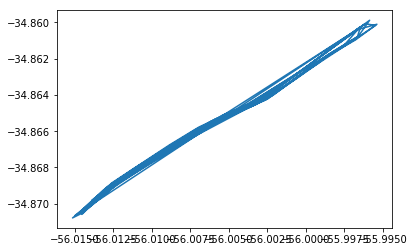

In [155]:
plt.plot(right_bound_violations.longitude,
         right_bound_violations.latitude)

Podemos ver que es la linea 142 que llega hasta la terminal ANCAP de la ciudad de la costa por lo cual no es un outlier.

![Montevideo](images/right_bound_error.png)

![Montevideo](images/right_bound_error_2.png)

Ahora que sabemos que no existen outliers fuera de montevideo revisaremos las lineas de forma independiente

## Outliers por linea

Primero tenemos que agrupar por linea los datos

In [156]:
data_sorted_by_line = stage_1_data.sort_values(by='line')
lines = data_sorted_by_line.line.unique()
data_sorted_by_line.head()

id  line  longitude   latitude            timestamp
0       76   217 -56.222400 -34.855885  2018-10-02 14:38:53
45991   13   217 -56.116450 -34.871450  2018-10-02 16:06:25
45998   99   217 -56.155420 -34.883700  2018-10-02 16:06:25
46008   29   217 -56.222800 -34.855732  2018-10-02 16:06:25
46017  105   217 -56.083332 -34.882200  2018-10-02 16:06:25

In [157]:
line_numbers = data_sorted_by_line.line.unique()
print('Lines are:')
line_numbers

Lines are:


array([ 217,  218,  227,  231,  236,  237,  242,  254,  266,  272,  340,
        341,  342,  343,  344,  345,  372,  386,  389,  395,  400,  403,
        498,  501,  522,  540,  542,  565,  566,  863,  873, 1476, 1483,
       1922, 2388, 2390, 2391, 2392, 2393, 2402, 2403, 2408, 2409, 2422,
       2454, 2601, 2775, 2924, 7512, 7516, 7517, 7526, 7528, 7529, 7533,
       7703, 7704, 7898, 7899, 7902, 7903, 7918, 7919, 7920, 7921, 7926,
       7927, 7928, 7929])

In [218]:
lines = {}

for line_number in line_numbers:
    lines[line_number] = stage_1_data[stage_1_data.line==line_number]

Ahora tenemos un diccionaro de la forma { **linea** : _informacionde-la-linea_ }

Vamos a crear algunas funciones para facilitar la busqueda de outliers.

In [219]:
def plot_line(line):
    plt.title('Line {0}'.format(line.line.iloc[0]))
    plt.plot(line.longitude, line.latitude,'-o')
    plt.show()

def plot_ids_line(line):
    line_ids = line.id.unique()
    plt.figure(figsize=(10,7))
    plt.title(line.line.iloc[0])
    different_ids = len(line_ids)
    colors = pl.cm.jet(np.linspace(0,1,different_ids))
    for size, id_ in enumerate(line_ids):
        l = line[line.id == id_]
        plt.plot(l.longitude, l.latitude, '-o', color=colors[size],markersize=(different_ids-size)*3)
    plt.show()

Ahora vamos a mostrar graficamente los reorridos
las prineras 10 lineas.

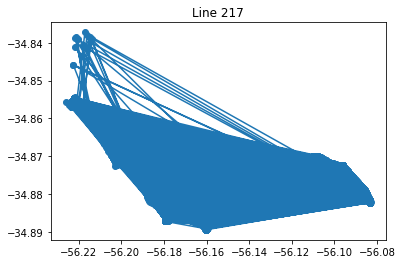

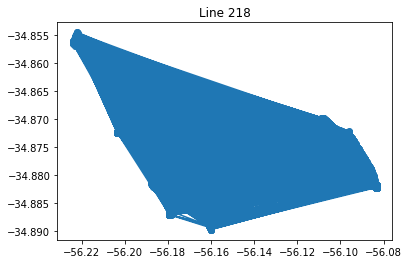

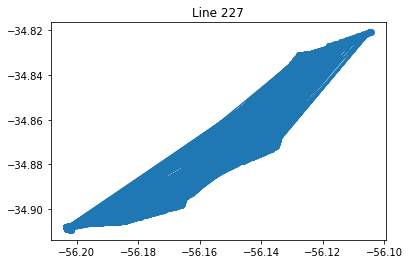

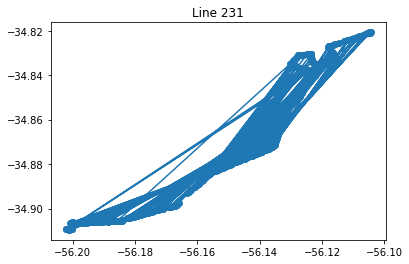

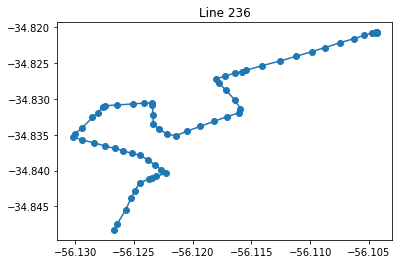

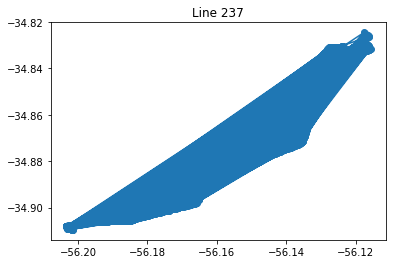

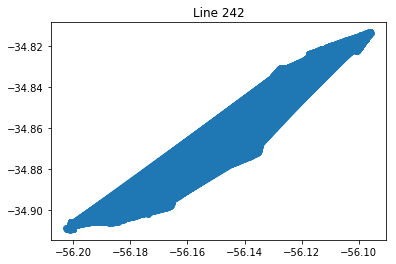

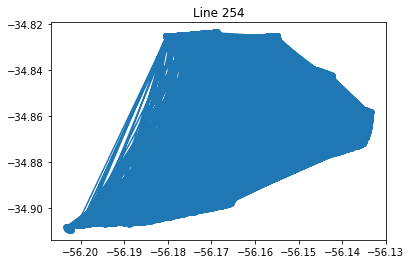

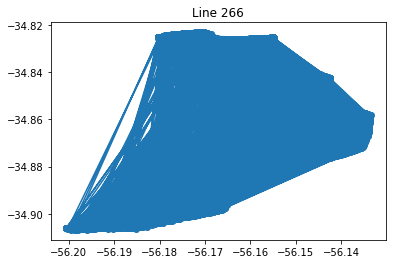

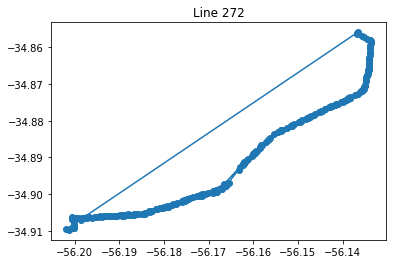

In [183]:
for line_number in line_numbers[:10]:
    plot_line(lines[line_number])

Podemos ver que tenemos un problema con la mayoria de las lineas, vamos a analizarlo tomando la linea 1476.

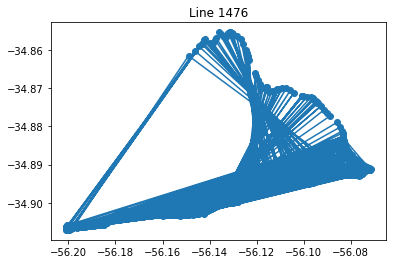

In [220]:
line_1476 = lines[1476] 
plot_line(line_1476)

Vamos a ordenarlos por tiempo

In [221]:
line_1476 = line_1476.sort_values(by='timestamp')
line_1476.head()

id  line  longitude   latitude            timestamp
10   285  1476 -56.169277 -34.903220  2018-10-02 14:39:08
60   263  1476 -56.082610 -34.884945  2018-10-02 14:39:08
110  525  1476 -56.080530 -34.892750  2018-10-02 14:39:08
155  962  1476 -56.186860 -34.905610  2018-10-02 14:39:08
210  263  1476 -56.083195 -34.883390  2018-10-02 14:39:23

Podemos ver que el problema esta ocacioando por tener tiempos de varios omnibus, asi que intentamos graficarlos nuevamente pero filtrando por id.

In [222]:
print('Unique ids for line 1476 are:')
line_1476_ids = line_1476.id.unique()
line_1476_ids

Unique ids for line 1476 are:


array([285, 263, 525, 962, 570, 276, 969, 589, 262, 275])

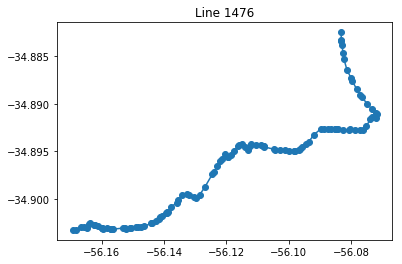

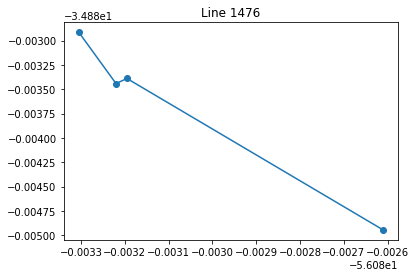

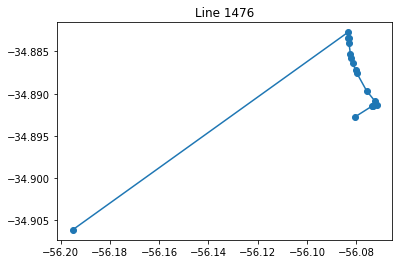

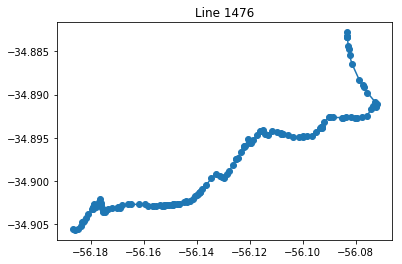

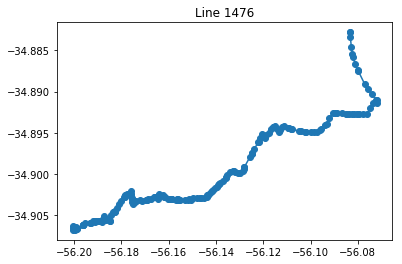

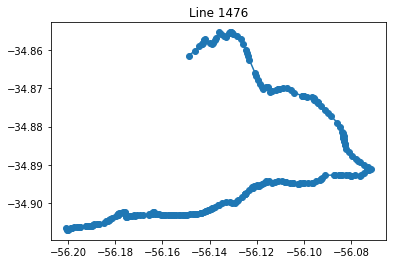

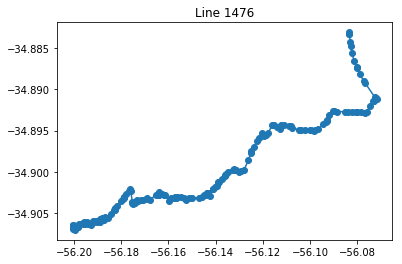

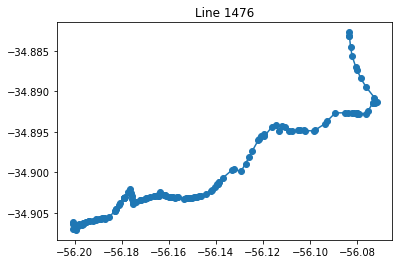

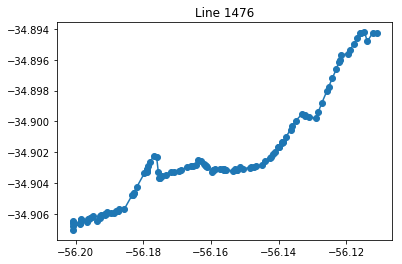

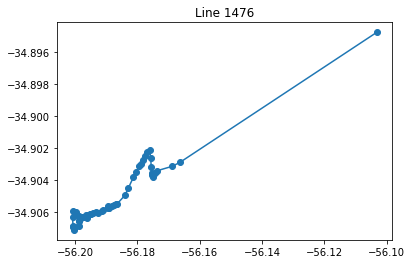

In [223]:
for id_ in line_1476_ids:
    plot_line(line_1476[line_1476.id == id_])

Ahora podemos ver que tenemos recorridos mas coherente. Aún asi vemos que algunos de los recorridos no son muy consistentes entre si.

Esto puede ser por:

* Variantes entre lineas.
* Recorridos de ida deiferentes a los de vuelta.
* Errores en los datos.

Vamos a comparar dos difernetes

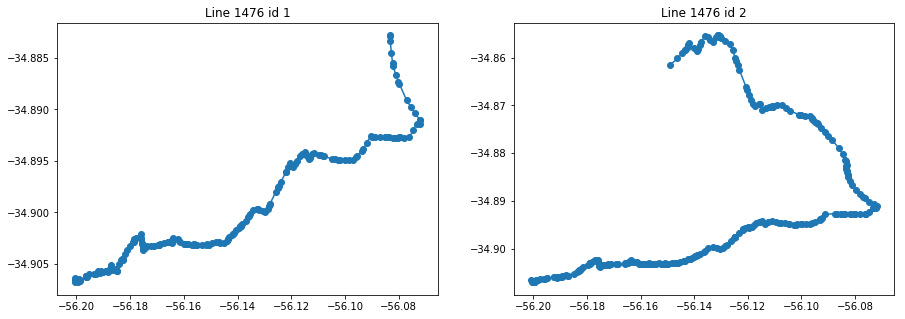

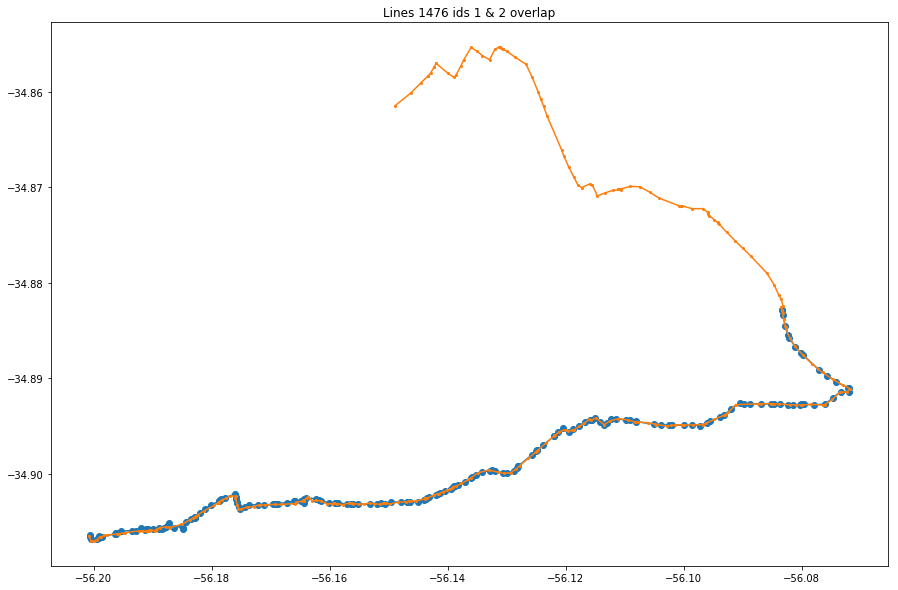

In [224]:
line_to_compare_1 = line_1476[line_1476.id == line_1476_ids[4]]
line_to_compare_2 = line_1476[line_1476.id == line_1476_ids[5]]

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Line 1476 id 1')
plt.plot(line_to_compare_1.longitude, line_to_compare_1.latitude, '-o')
plt.subplot(122)
plt.title('Line 1476 id 2')
plt.plot(line_to_compare_2.longitude, line_to_compare_2.latitude, '-o')
plt.show()
plt.figure(figsize=(15,10))
plt.title('Lines 1476 ids 1 & 2 overlap')
plt.plot(line_to_compare_1.longitude, line_to_compare_1.latitude, '-o')
plt.plot(line_to_compare_2.longitude, line_to_compare_2.latitude, '-o', markersize=2)
plt.show()

Podemos ver que es la misma linea con la misma trayectoria solo que no completa el recorrido. Esto puede ser por:
* La simulacion se termino antes de obtener los puntos faltantes.
* Es una sublinea

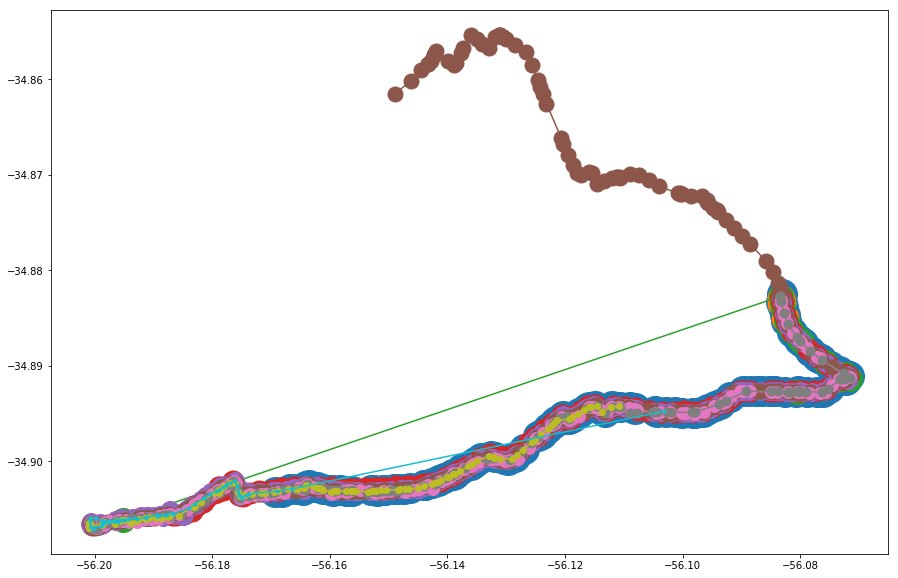

In [189]:
plt.figure(figsize=(15,10))
for size, id_ in enumerate(line_1476_ids):
    l = line_1476[line_1476.id == id_]
    plt.plot(l.longitude, l.latitude, '-o', markersize=(len(line_1476_ids)-size)*3)

Podemos comprobar que todas las coordenadas forman parte de la misma linea, aun asi se pueden ver saltos importantes, es decir, periodos de tiempo en los cuales no se obtienen datos de las coorenadas del omnibus.

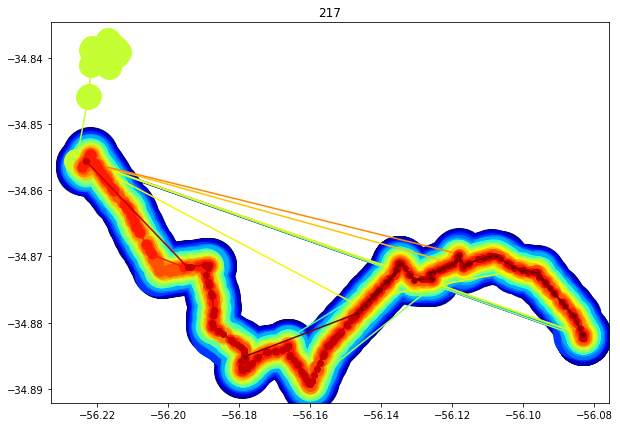

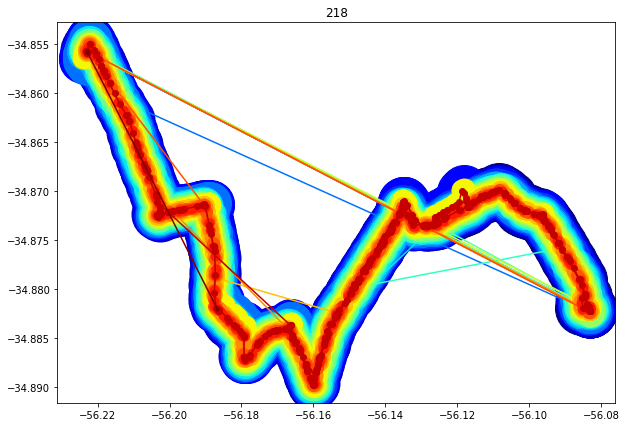

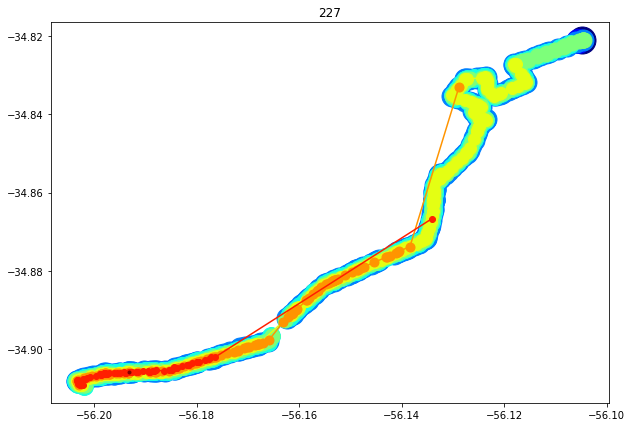

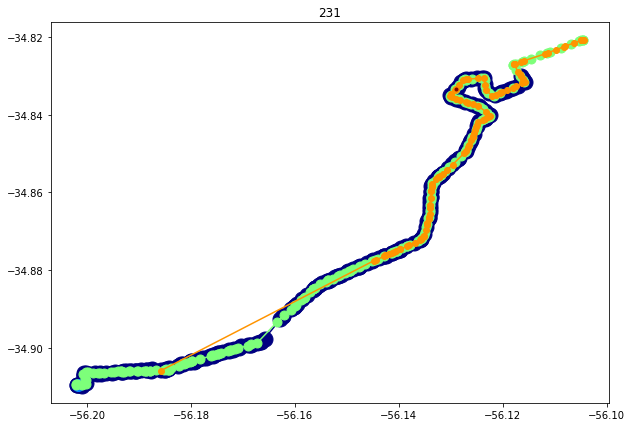

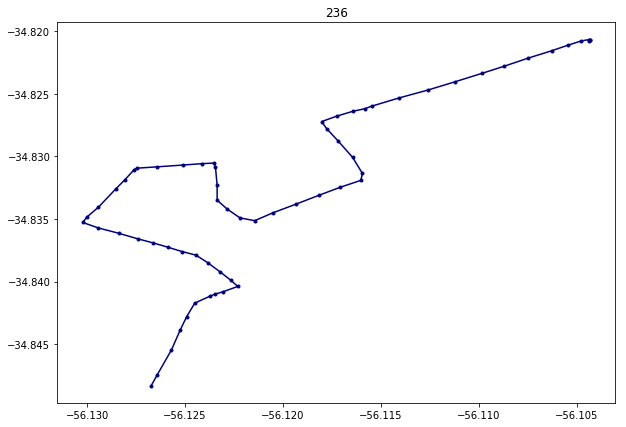

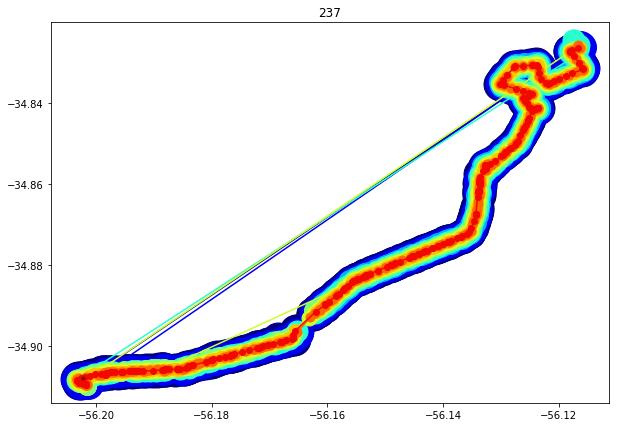

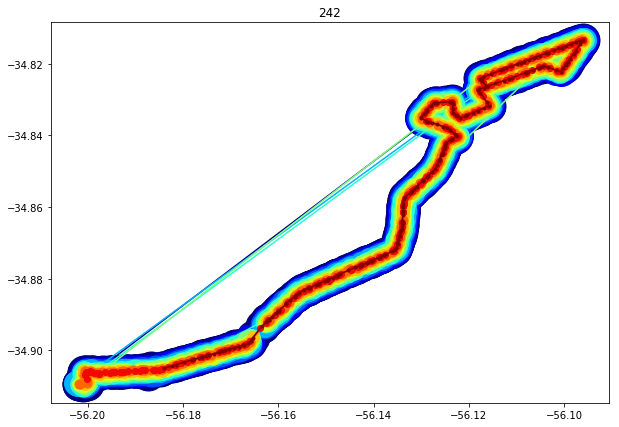

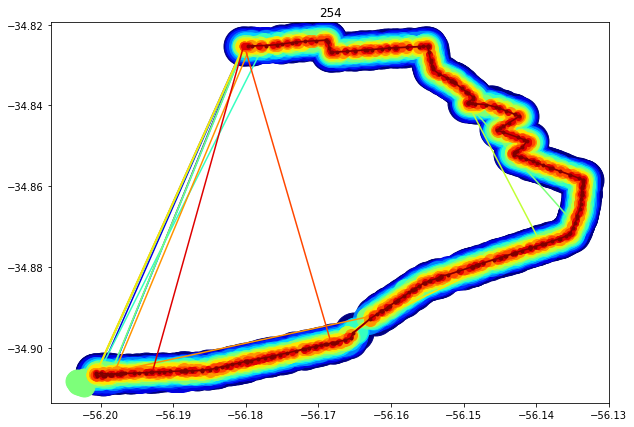

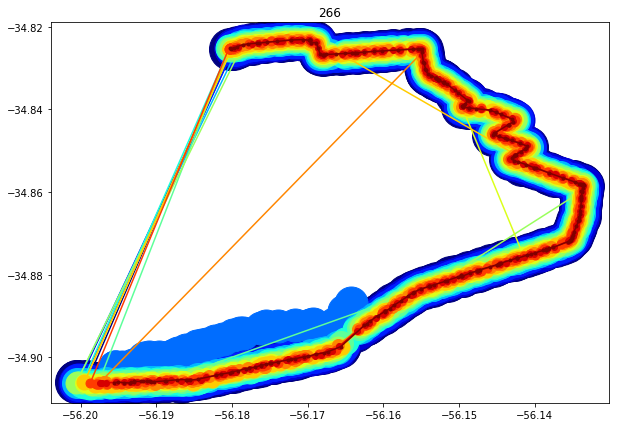

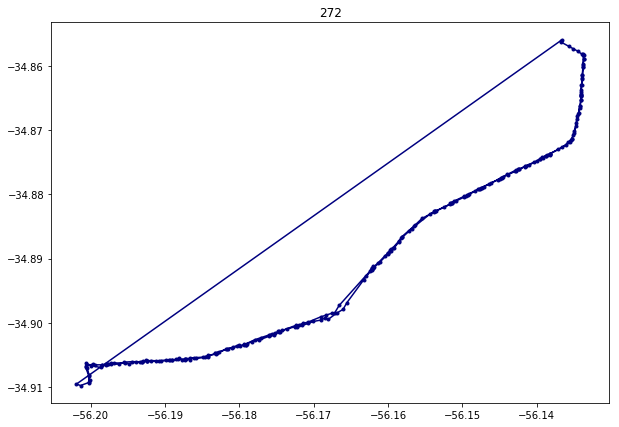

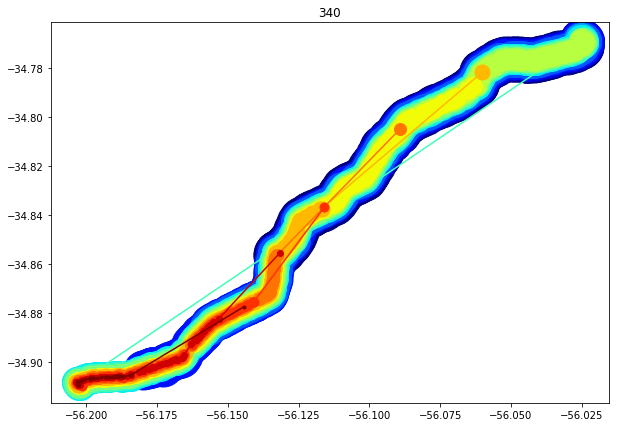

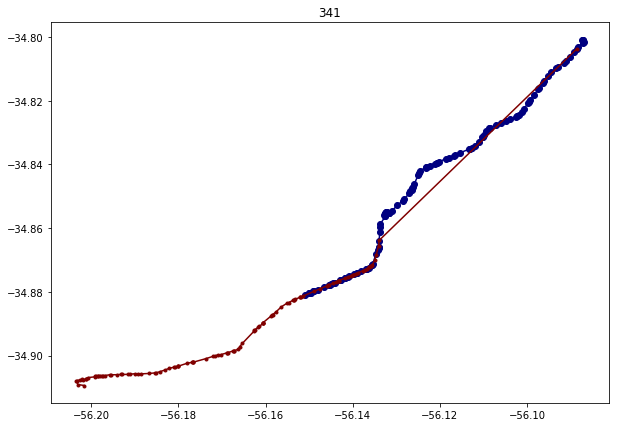

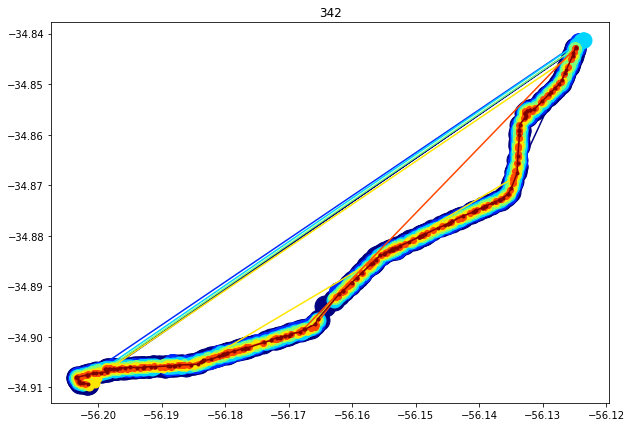

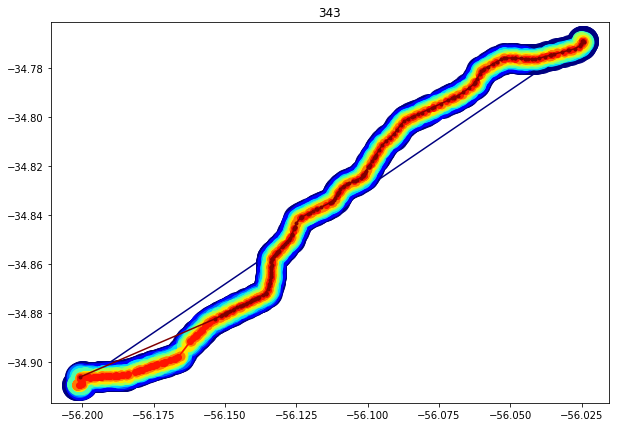

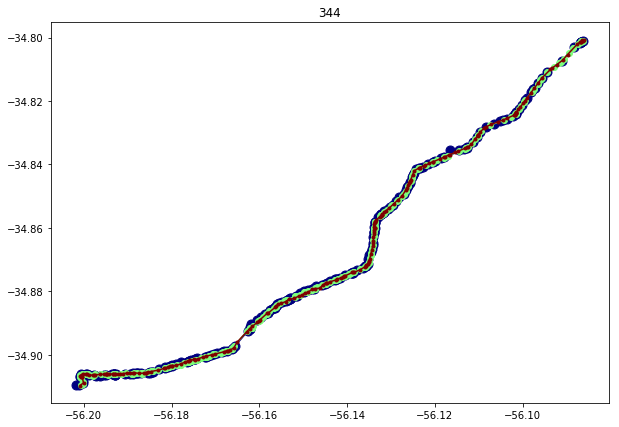

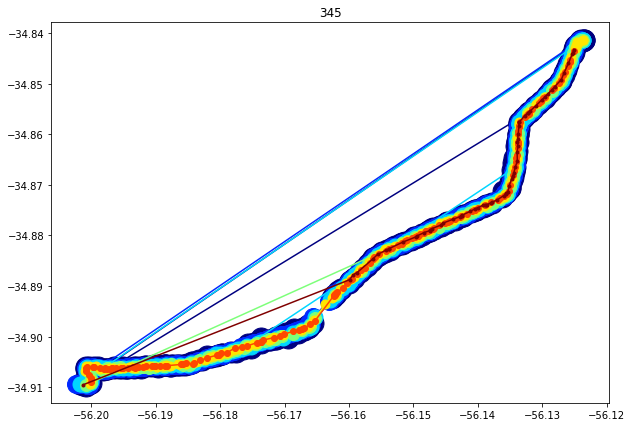

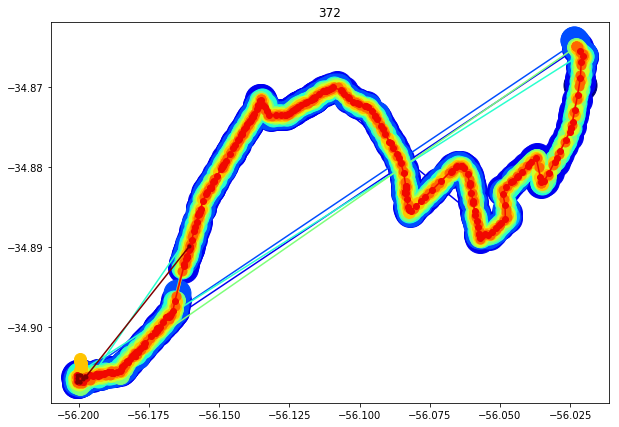

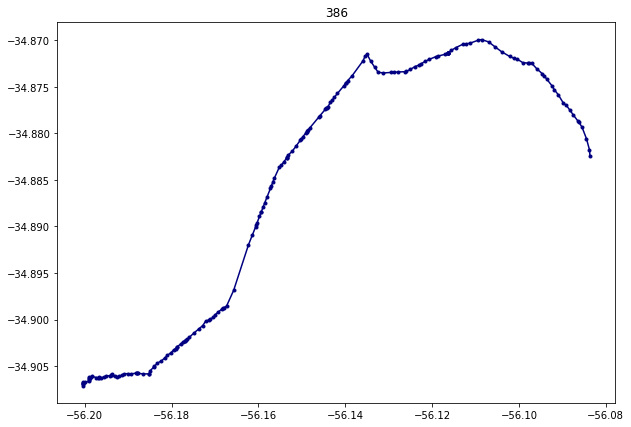

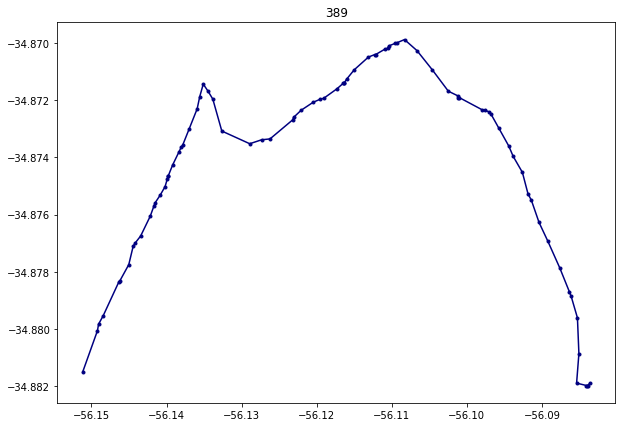

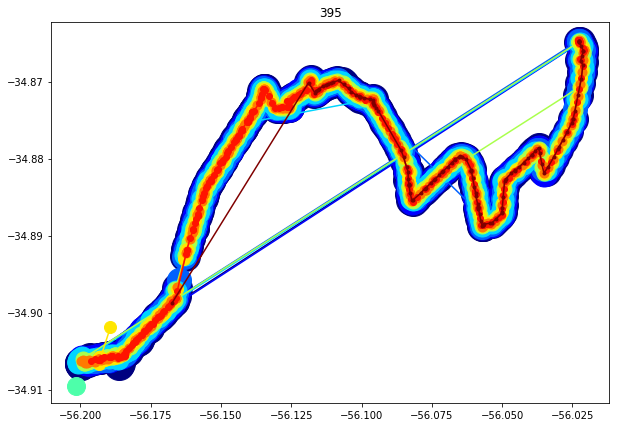

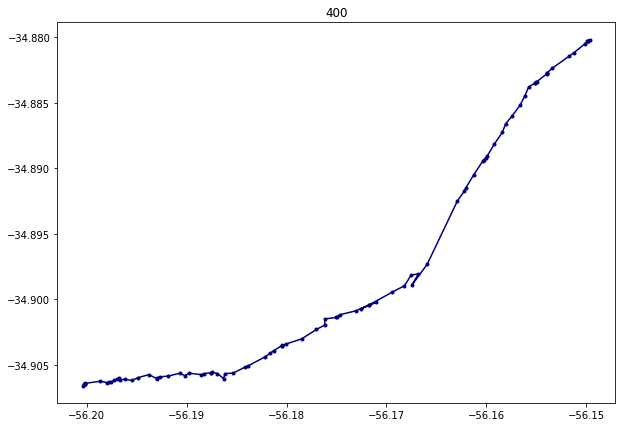

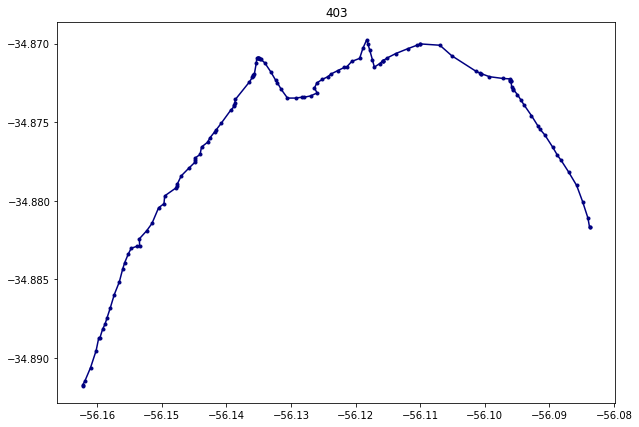

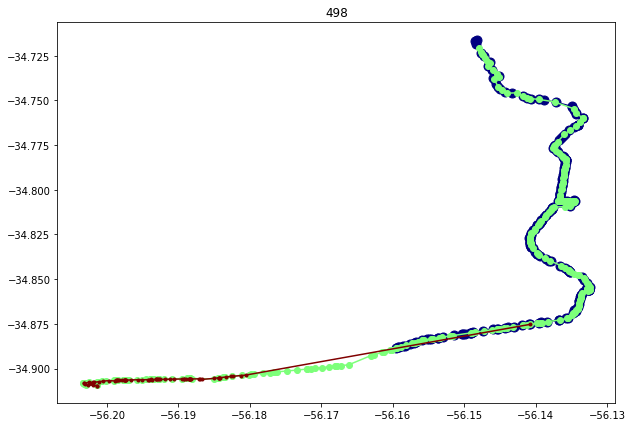

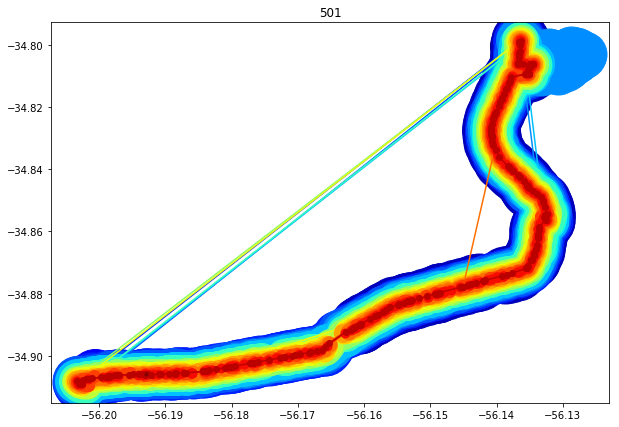

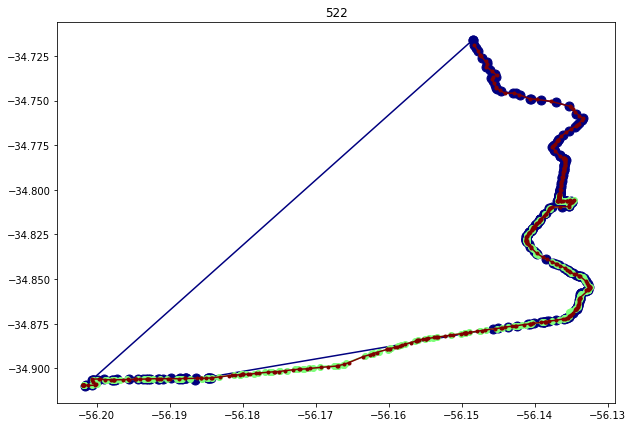

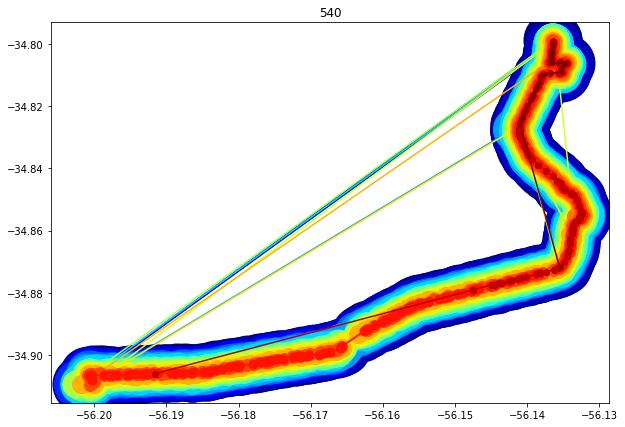

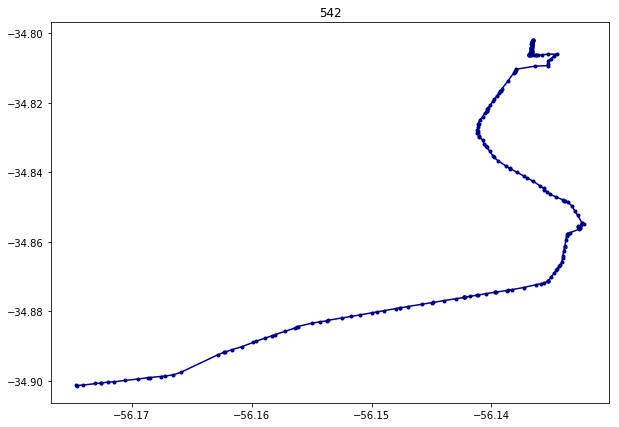

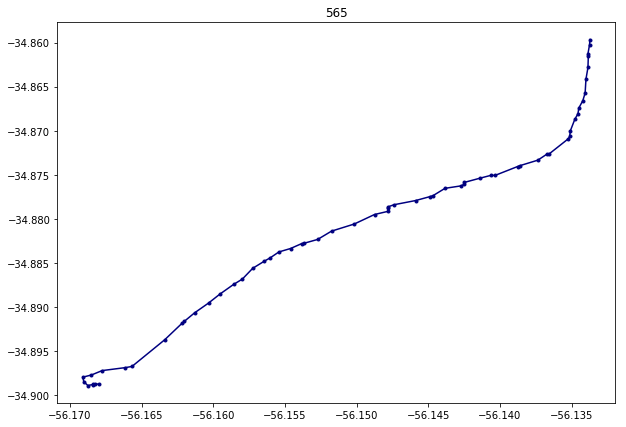

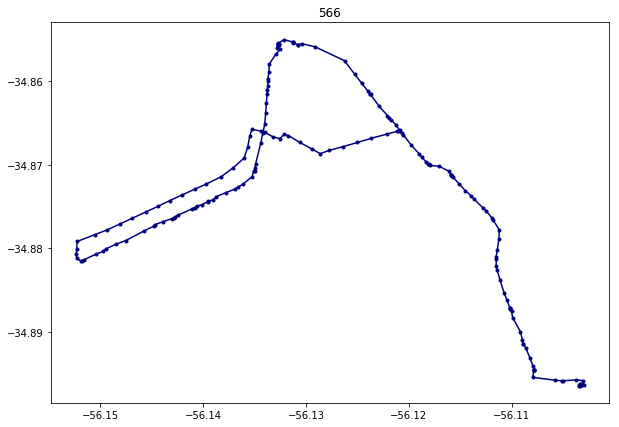

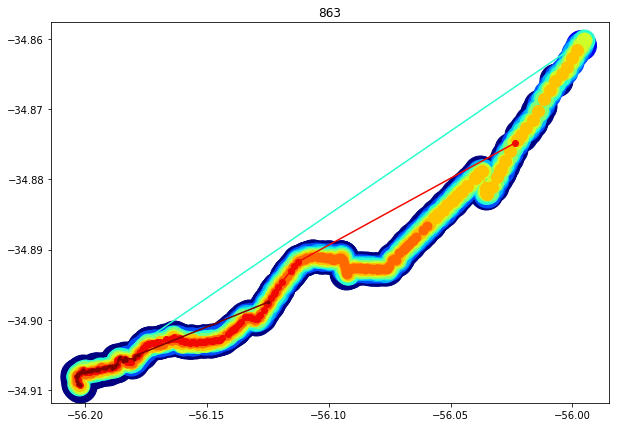

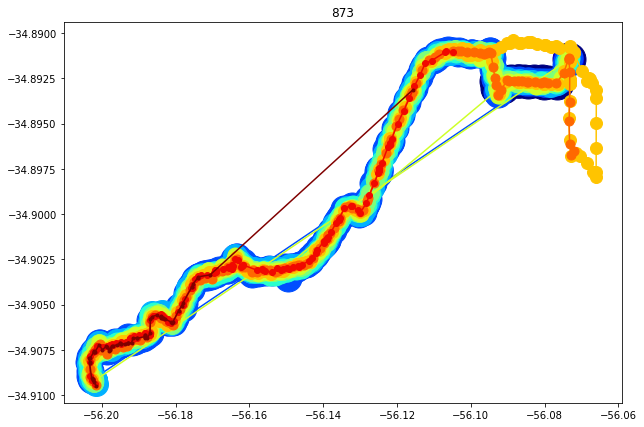

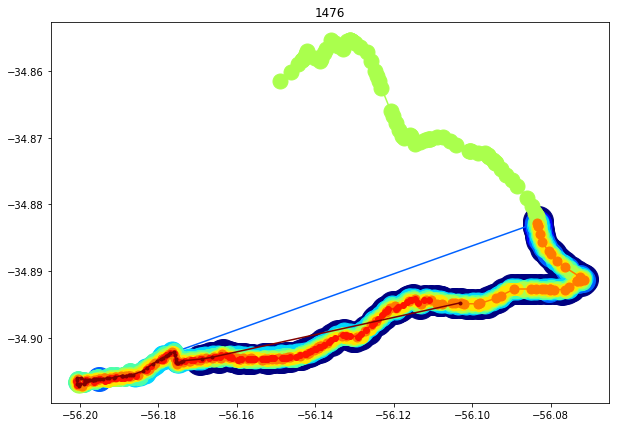

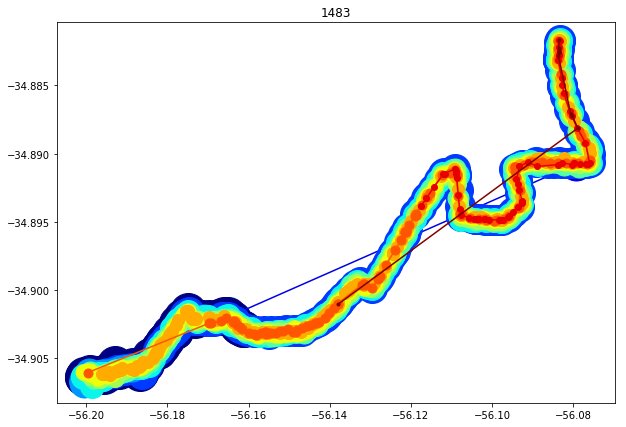

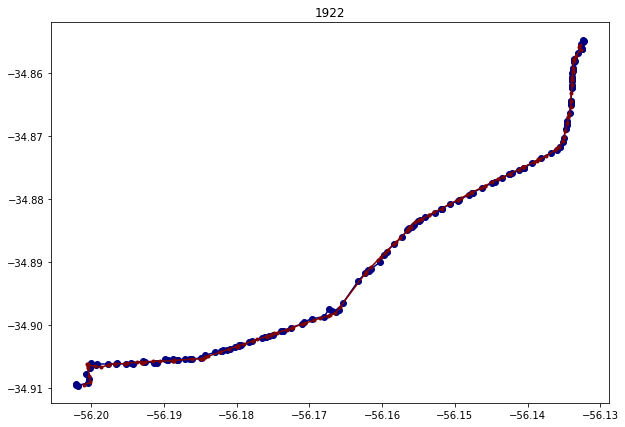

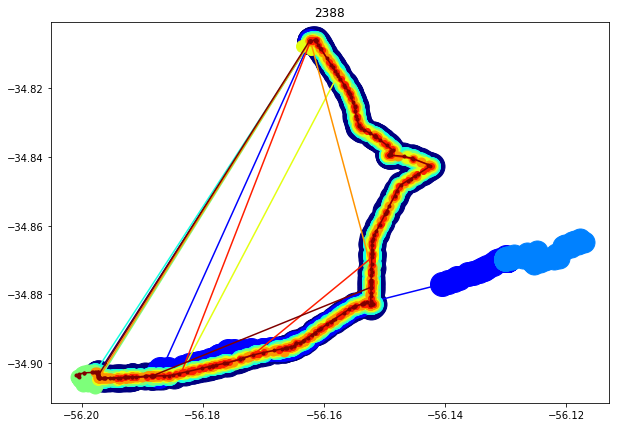

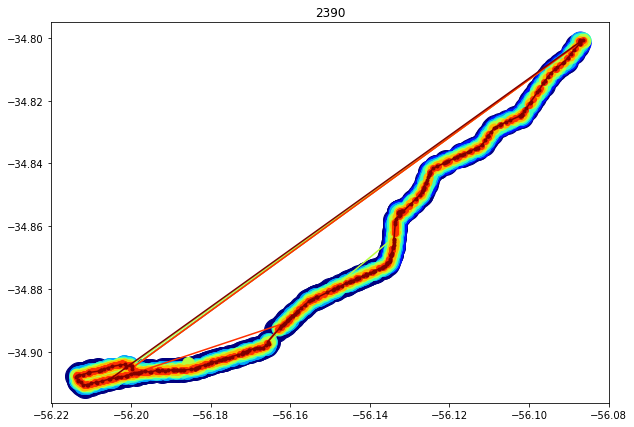

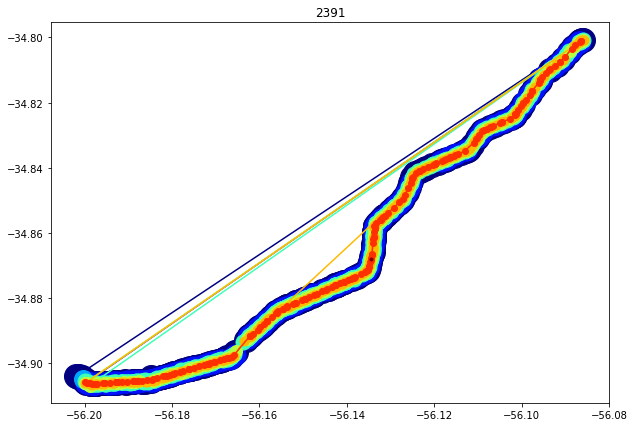

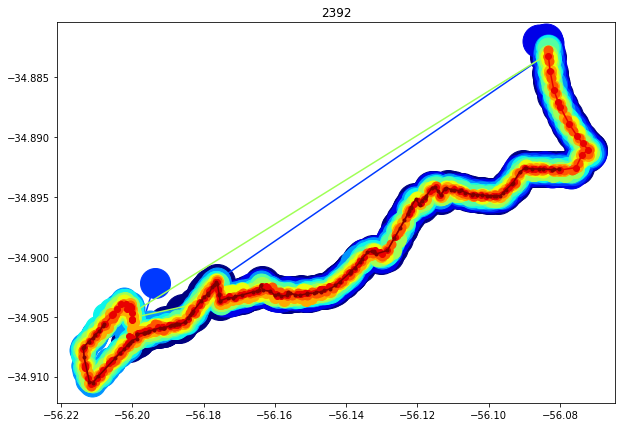

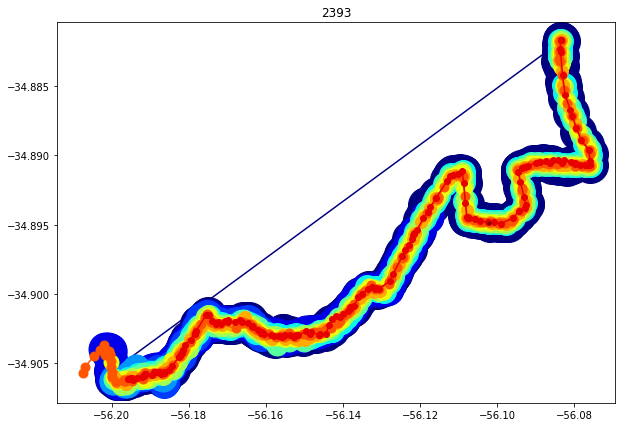

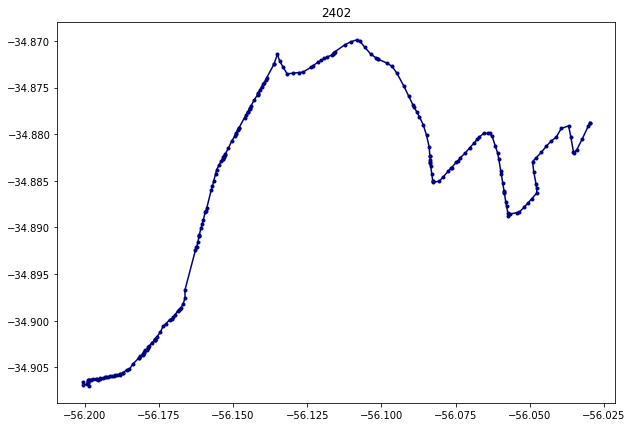

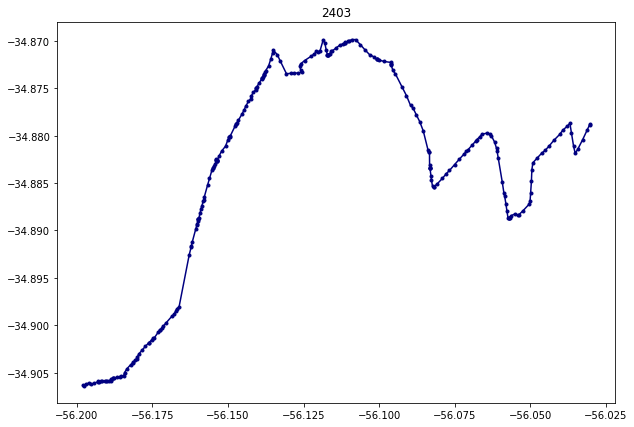

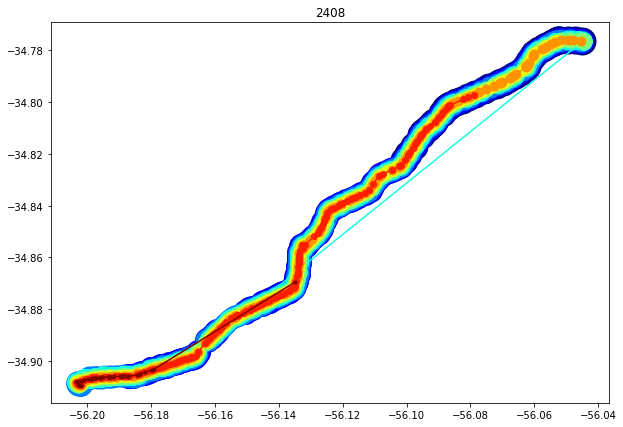

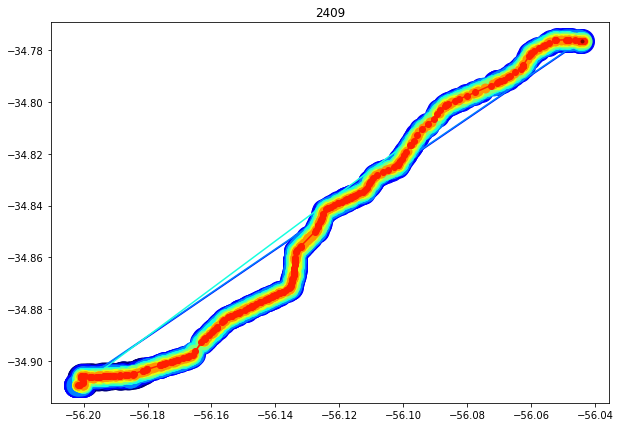

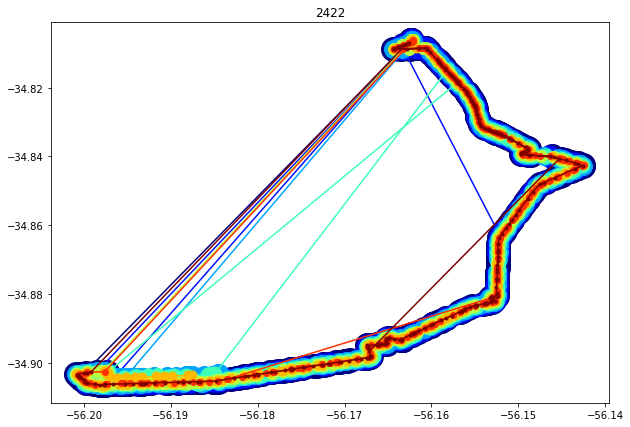

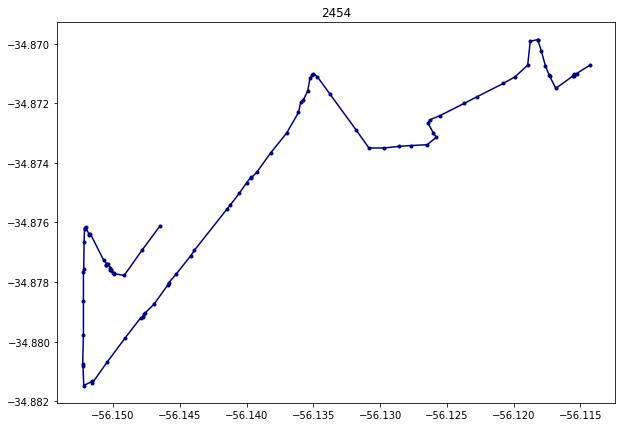

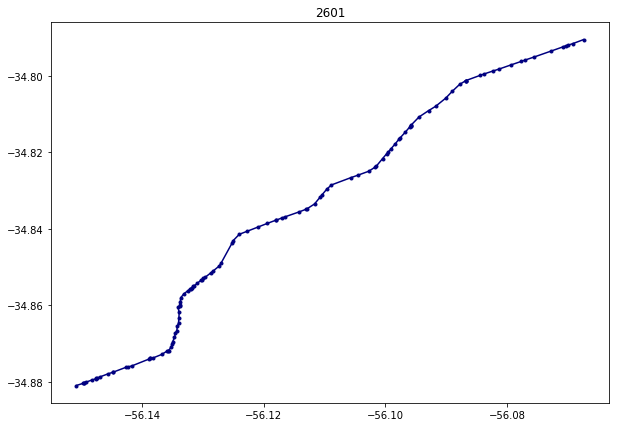

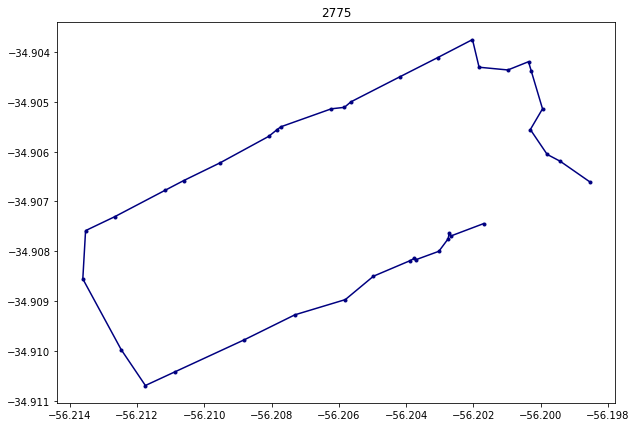

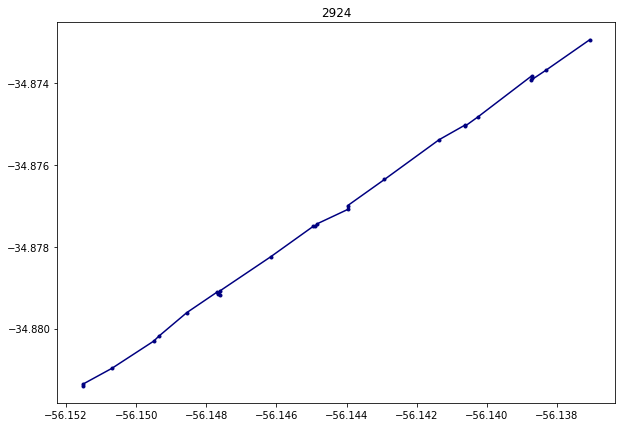

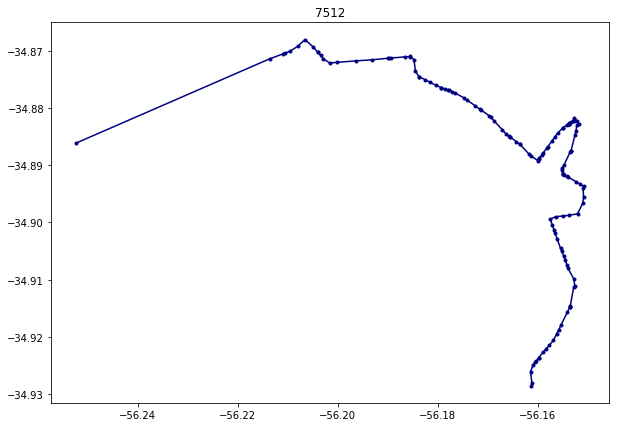

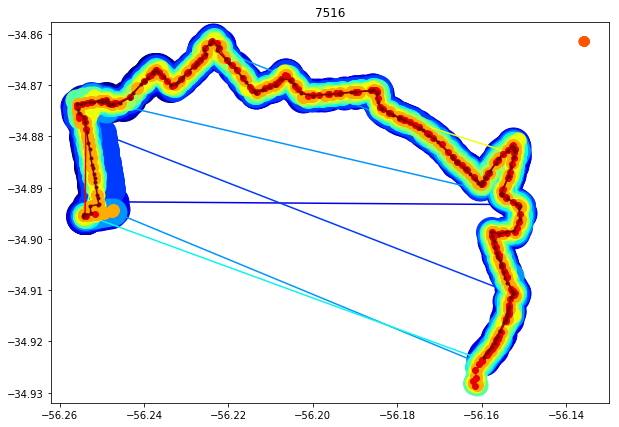

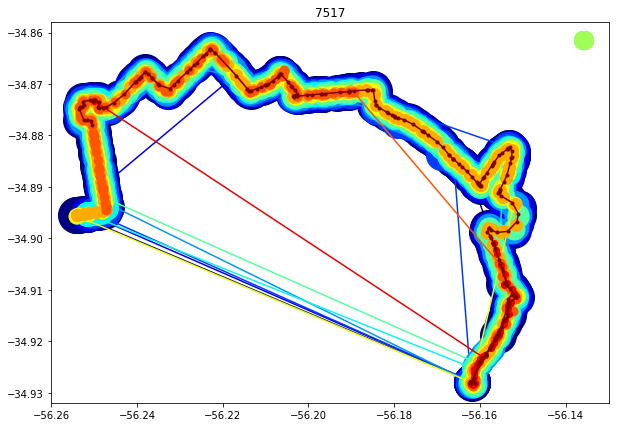

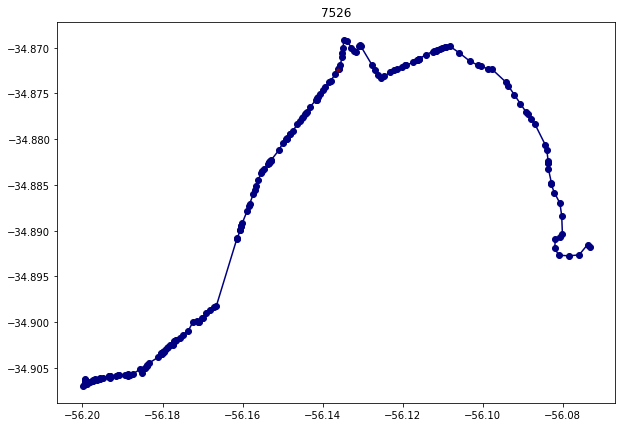

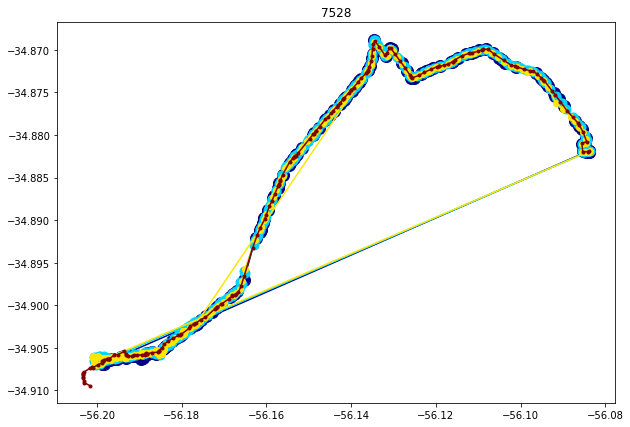

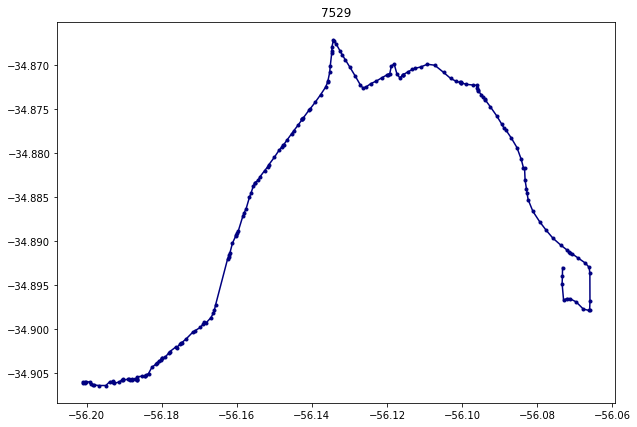

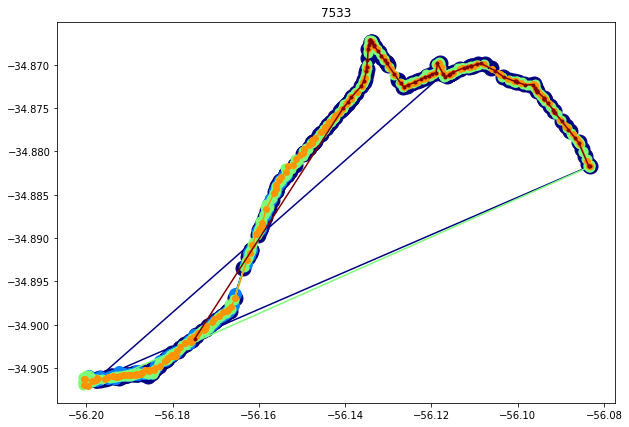

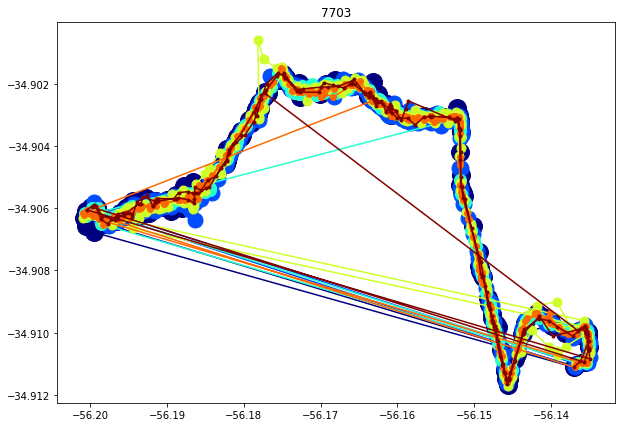

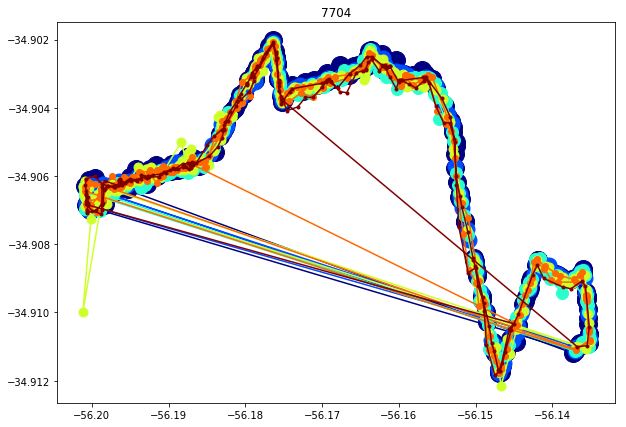

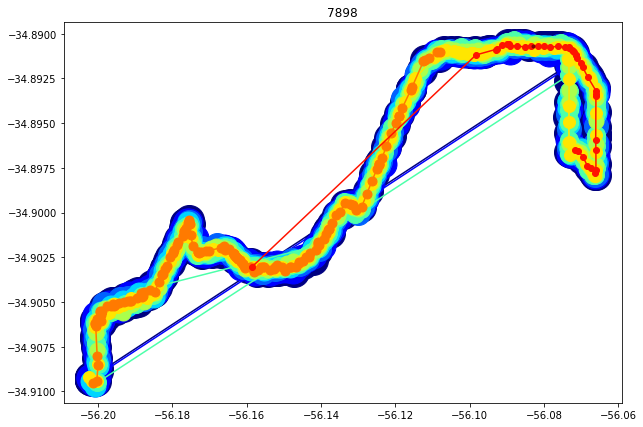

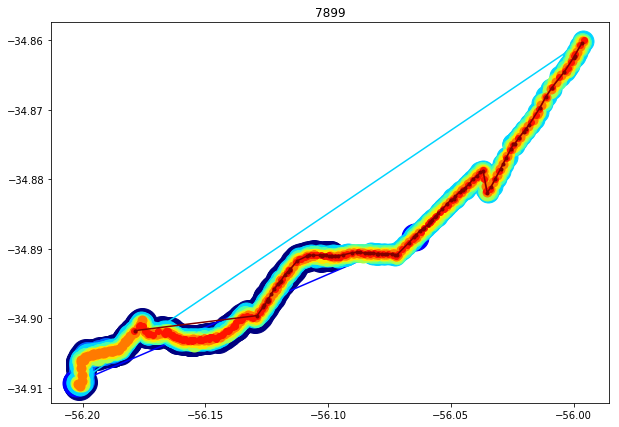

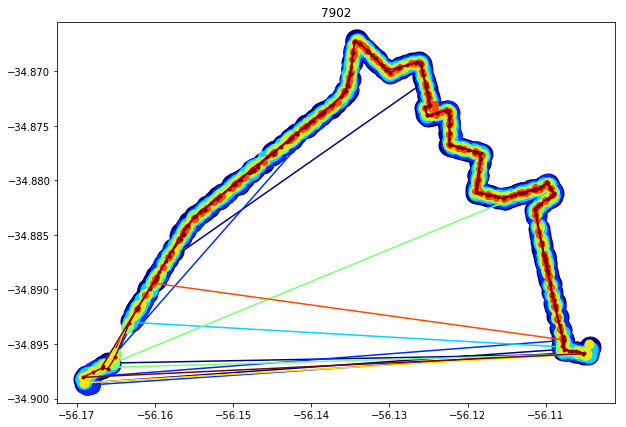

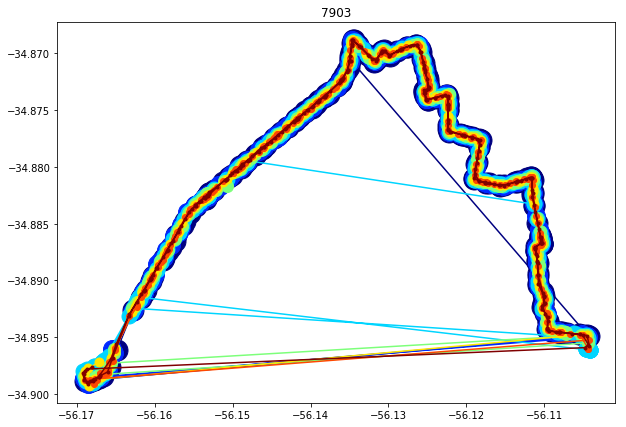

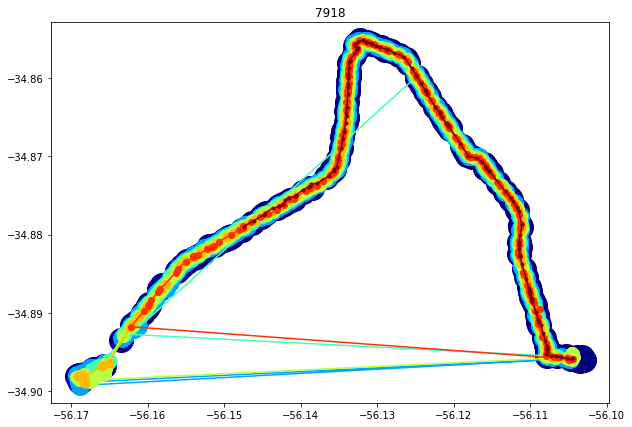

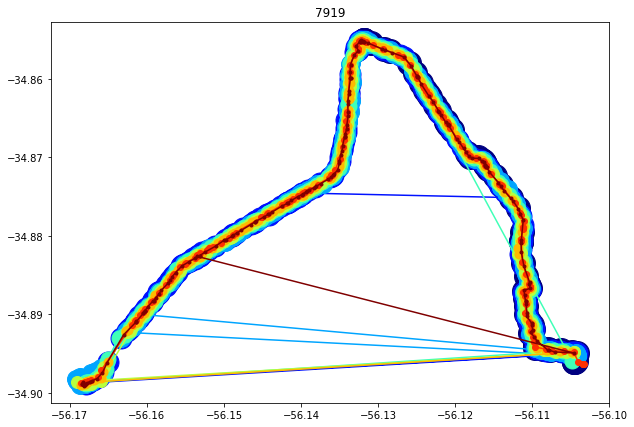

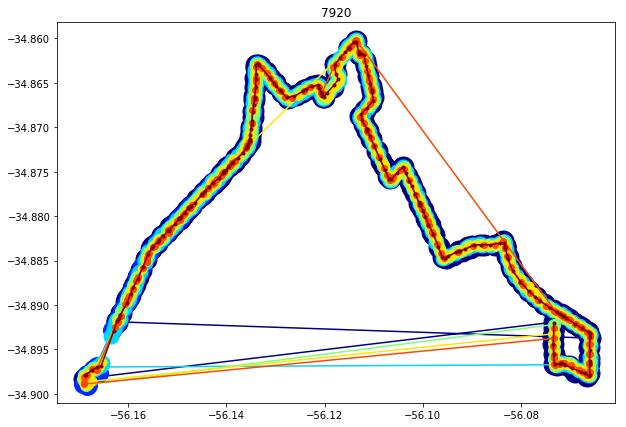

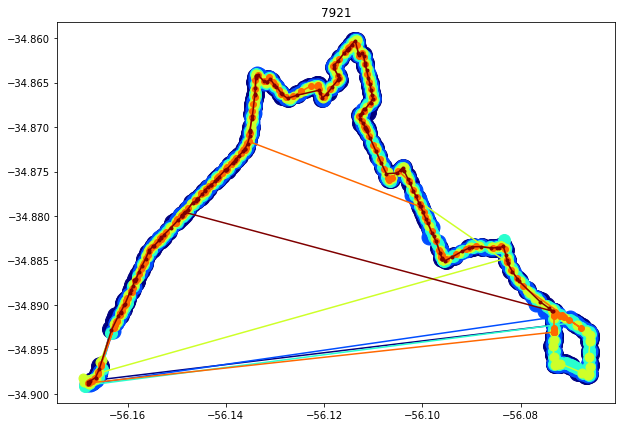

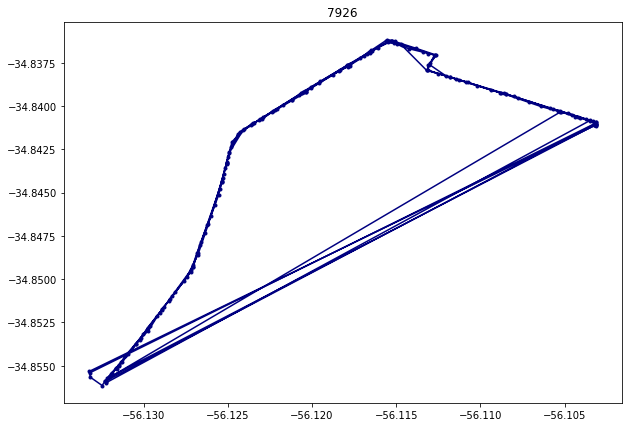

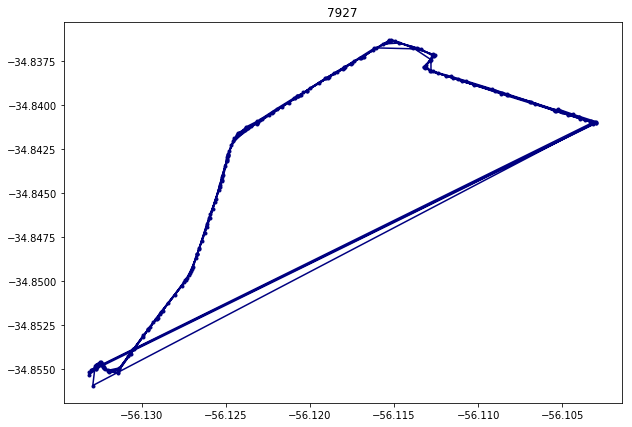

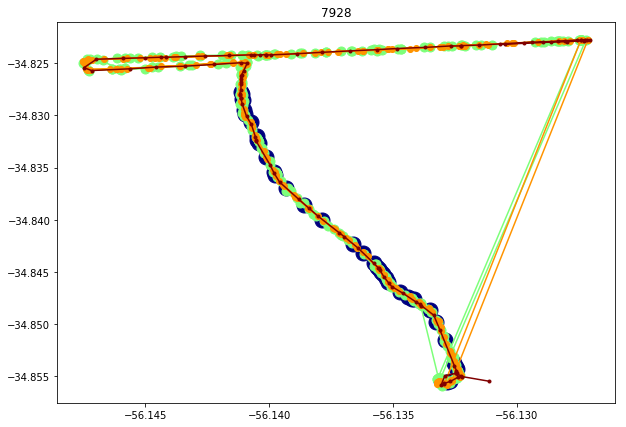

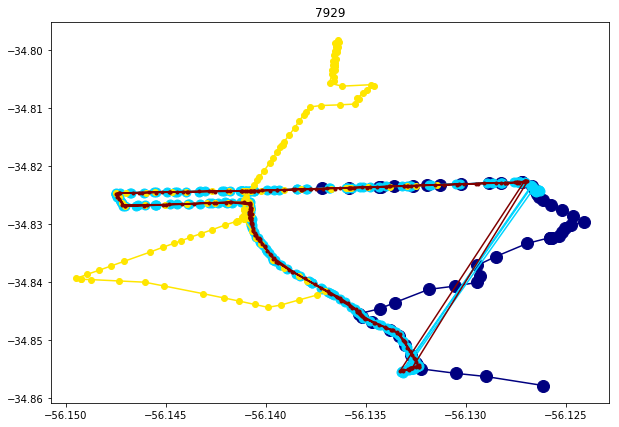

In [190]:
for line_number in line_numbers:
    plot_ids_line(lines[line_number])

Podemos ver saltos abruptos en casi todas las lineas. Ahora vamos a eliminar coordenadas que esten conectadas con una larga distancia.

Para calcular la distancia entre dos coordenadas vamos a utilizar **Haversine Formula**

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/3547c826fa4abb6bcdf0d4d1de98aaa020ed91d6)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Law-of-haversines.svg/440px-Law-of-haversines.svg.png)

In [191]:
def distance_between(lat1, lon1, lat2, lon2):
    R = 6371e3; #meters
    φ1 = np.deg2rad(lat1)
    φ2 = np.deg2rad(lat2)
    Δφ = np.deg2rad(lat2-lat1)
    Δλ = np.deg2rad(lon2-lon1)

    a = np.sin(Δφ/2)*np.sin(Δφ/2) + np.cos(φ1)*np.cos(φ2)*np.sin(Δλ/2)*np.sin(Δλ/2)
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1-a))

    d = R * c
    return d

Tomemos dos puntos arbitrarios para comprobar la implementacion.

In [192]:
distance_between(-34.890052, -56.187313, -34.887439, -56.132813)

4979.386812255401

Podemos comprobar que el metodo funciona correctamente.

![Haversine](./images/haversine.png)

Ahora tomemos una linea como ejemplo, en este caso 217 y calculemos las distancias entre las coorenadas consecutivas.

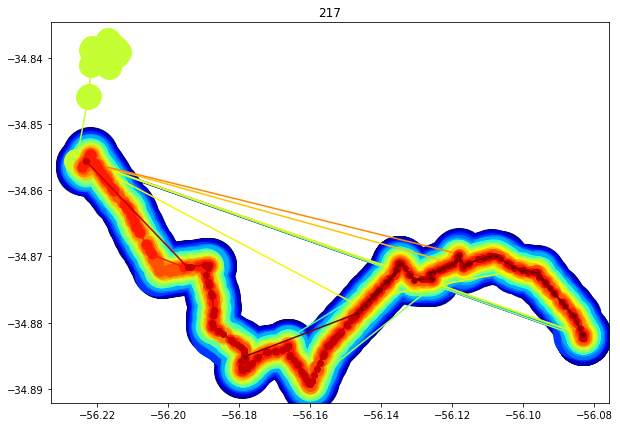

In [215]:
line_217 = lines[217]
plot_ids_line(line_217)

In [216]:
line_217_ids = line_217.id.unique()
line_217_ids

array([ 76,  68,  15,  13, 105,  91,  10,  45,  34,  29,  20,  90,  82,
        40,  99,  88,   5,  52])

In [217]:
line_217.head()

id  line  longitude   latitude            timestamp
0    76   217 -56.222400 -34.855885  2018-10-02 14:38:53
9    68   217 -56.168000 -34.884132  2018-10-02 14:39:08
15   15   217 -56.223000 -34.855633  2018-10-02 14:39:08
51   13   217 -56.186050 -34.881200  2018-10-02 14:39:08
93  105   217 -56.203316 -34.870884  2018-10-02 14:39:08

In [213]:
line_217_ = pd.DataFrame(line_217_)
line_217_['longitude_next'] = line_217.longitude.shift(1)
line_217_['latitude_next']  = line_217.latitude.shift(1)

In [214]:
line_217_.head()

id  line  longitude   latitude            timestamp    distances  \
78083  52   217 -56.083350 -34.881916  2018-10-02 17:11:12  9510.756541   
78203  52   217 -56.083366 -34.881900  2018-10-02 17:11:27  9515.079003   
78321  52   217 -56.083366 -34.881916  2018-10-02 17:11:42  9533.288155   
78673  52   217 -56.083400 -34.881916  2018-10-02 17:12:27  4042.063131   
79024  52   217 -56.083380 -34.881900  2018-10-02 17:13:12  7523.899062   

       latitude_next  longitude_next  
78083     -34.887733      -56.162100  
78203     -34.887085      -56.162815  
78321     -34.886368      -56.163550  
78673     -34.886300      -56.163650  
79024     -34.876766      -56.143550

In [198]:
line_217_['distances'] = np.zeros(len(line_217_))
line_217_['distances'] = line_217_.apply(lambda x: distance_between(line_217_.latitude,
                                                                    line_217_.longitude,
                                                                    line_217_.latitude_next,
                                                                    line_217_.longitude_next))

In [199]:
line_217_.head()

id  line  longitude   latitude            timestamp    distances  \
78083  52   217 -56.083350 -34.881916  2018-10-02 17:11:12  9510.756541   
78203  52   217 -56.083366 -34.881900  2018-10-02 17:11:27  9515.079003   
78321  52   217 -56.083366 -34.881916  2018-10-02 17:11:42  9533.288155   
78673  52   217 -56.083400 -34.881916  2018-10-02 17:12:27  4042.063131   
79024  52   217 -56.083380 -34.881900  2018-10-02 17:13:12  7523.899062   

       latitude_next  longitude_next  
78083     -34.876465      -56.187400  
78203     -34.876280      -56.187450  
78321     -34.875935      -56.187620  
78673     -34.872818      -56.126300  
79024     -34.884920      -56.165783

In [200]:
line_217_.drop(['latitude_next','longitude_next'], axis=1, inplace=True)

In [201]:
line_217_.head()

id  line  longitude   latitude            timestamp    distances
78083  52   217 -56.083350 -34.881916  2018-10-02 17:11:12  9510.756541
78203  52   217 -56.083366 -34.881900  2018-10-02 17:11:27  9515.079003
78321  52   217 -56.083366 -34.881916  2018-10-02 17:11:42  9533.288155
78673  52   217 -56.083400 -34.881916  2018-10-02 17:12:27  4042.063131
79024  52   217 -56.083380 -34.881900  2018-10-02 17:13:12  7523.899062

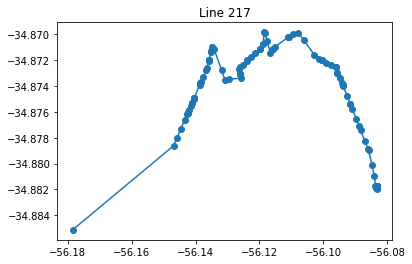

In [202]:
plot_line(line_217_)